In [57]:
import matplotlib.pyplot as plt
import numpy as np
from lmfit.models import LinearModel

In [62]:
channel = 7

In [117]:
if channel == 0:
    charges  = np.array([607.2,536.3,  #Co 1 e 2
                         311.8])       #Cs
    sigmas   = np.array([3.5,3.1, 
                         1.8])
    energies = np.array([1333,1173,    #Co 1 e 2
                         661.7])       #Cs
    
if channel == 7:
    chargesCs = [1695.9]
    chargesCo = [3613.6, 3172]
    #chargesBa = [992.7, 106.5]
    chargesBa = [989.8, 792.7, 100.6]

    energiesCs = [661.7]
    energiesCo = [1333, 1173]
    energiesBa = [366, 289, 81]

    sigmaCs = [20]
    sigmaCo = [43, 37]
    #sigmaBa = [11.7, 1.3]
    sigmaBa = [11.7, 9.3, 1.1]

    #sigmaCo = [20, 20]
    #sigmaBa = [20, 20]


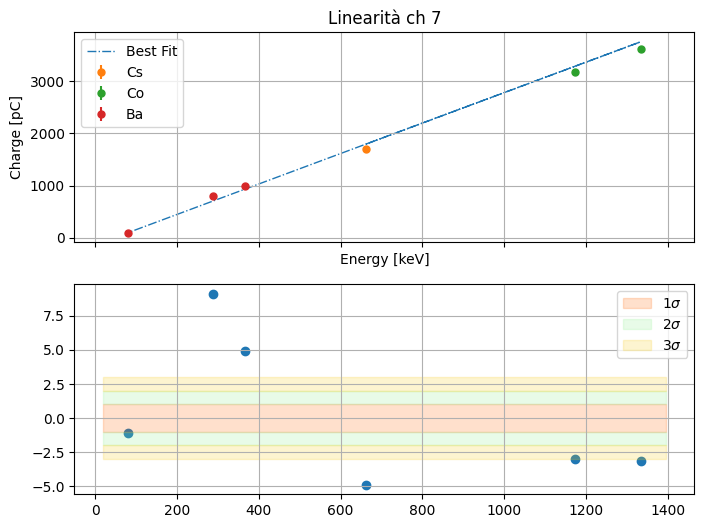

In [118]:
model = LinearModel(prefix = "l")
params = model.guess(chargesCs + chargesCo + chargesBa, x = energiesCs + energiesCo + energiesBa)

result = model.fit(chargesCs + chargesCo + chargesBa, params, 
                   x = energiesCs + energiesCo + energiesBa, 
                   weights = 1 / np.array(sigmaCs + sigmaCo + sigmaBa))
comps = result.eval_components()                        #Plotto il best fit + le componenti


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex = True)

ax1.plot(energiesCs + energiesCo + energiesBa, result.best_fit, label='Best Fit', zorder = -100, ls = "-.", marker = "", linewidth = 1)

#plt.plot(energiesCs, chargesCs, ls = "", marker = "o")
ax1.errorbar(energiesCs, chargesCs, sigmaCs, ls = "", label = "Cs", marker = "o", markersize = 5)
ax1.errorbar(energiesCo, chargesCo, sigmaCo, ls = "", label = "Co", marker = "o", markersize = 5)
ax1.errorbar(energiesBa, chargesBa, sigmaBa, ls = "", label = "Ba", marker = "o", markersize = 5)

ax1.set_title(f'Linearità ch {channel}')
ax1.grid()
ax1.set_xlabel("Energy [keV]")
ax1.set_ylabel("Charge [pC]")
ax1.legend()

res = (np.array(chargesCs + chargesCo +chargesBa) - result.best_fit) / np.array(sigmaCs + sigmaCo + sigmaBa)

ax2.scatter(energiesCs + energiesCo + energiesBa, res)
xlim = ax2.get_xlim()

ax2.fill_between(xlim, [-1, -1], [1, 1], color = "#FF6700", alpha = 0.2, label = r'$1\sigma$')
ax2.fill_between(xlim, [-2, -2], [-1, -1], color = "lightgreen", alpha = 0.2, label = r'$2\sigma$')
ax2.fill_between(xlim, [1, 1], [2, 2], color = "lightgreen", alpha = 0.2)
ax2.fill_between(xlim, [2, 2], [3, 3], color = "#F7CB15", alpha = 0.2, label = r'$3\sigma$')
ax2.fill_between(xlim, [-3, -3], [-2, -2], color = "#F7CB15", alpha = 0.2)

ax2.legend()
ax2.grid()

In [107]:
print(result.fit_report())

[[Model]]
    Model(linear, prefix='l')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 5
    # variables        = 2
    chi-square         = 30.4554776
    reduced chi-square = 10.1518259
    Akaike info crit   = 13.0341398
    Bayesian info crit = 12.2530156
    R-squared          = 0.99999647
[[Variables]]
    lslope:      2.76822682 +/- 0.06007437 (2.17%) (init = 2.768227)
    lintercept: -79.5854423 +/- 51.8449974 (65.14%) (init = -79.58544)
[[Correlations]] (unreported correlations are < 0.100)
    C(lslope, lintercept) = -0.8354
